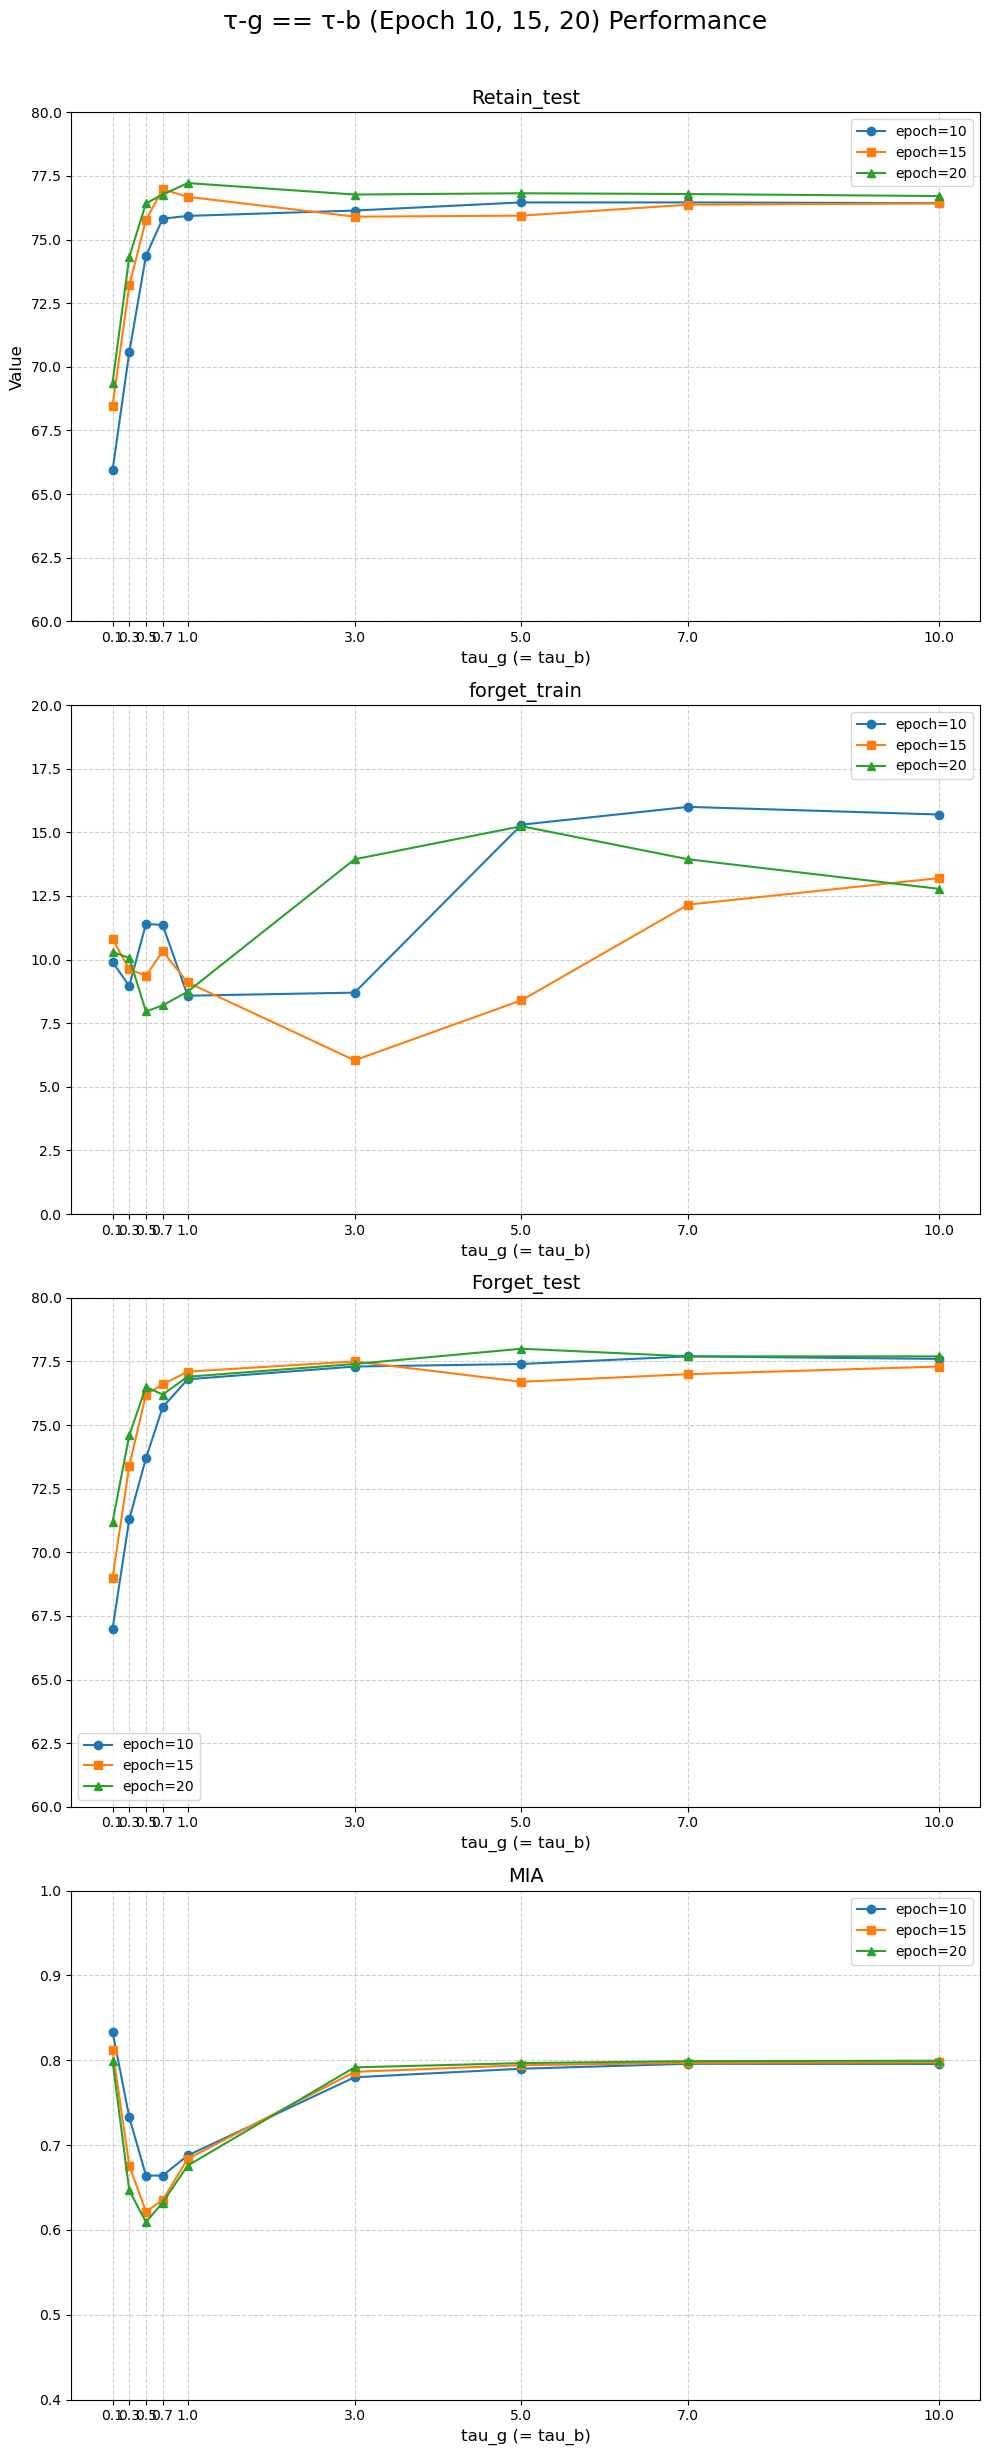

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== 1. 데이터 불러오기 =====
path = '/root/Public_Storage/madelab_khw/kd_tau_sample/ce_false_summary.csv'
data = pd.read_csv(path)

# ===== 2. tau_g == tau_b인 데이터만 필터링 =====
data_eq = data[data["tau_g"] == data["tau_b"]]

# ===== 3. Epoch별 subset =====
data_epoch_1 = data_eq[data_eq["epochs"] == 10]
data_epoch_3 = data_eq[data_eq["epochs"] == 15]
data_epoch_5 = data_eq[data_eq["epochs"] == 20]

# ===== 4. X축 눈금 (CSV에서 자동 추출) =====
x_ticks = sorted(data_eq["tau_g"].unique())

# ===== 5. 시각화 (5행 1열) =====
metrics = ["Retain_test", "forget_train", "Forget_test", "MIA",]
scales  = {"Retain_test":(60,80),
           "forget_train":(0,20),
           "Forget_test":(60,80),
           "MIA":(0.4,1),
          }

fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 25))

for i, m in enumerate(metrics):
    ax = axes[i]
    ax.plot(data_epoch_1["tau_g"], data_epoch_1[m], marker='o', label="epoch=10")
    ax.plot(data_epoch_3["tau_g"], data_epoch_3[m], marker='s', label="epoch=15")
    ax.plot(data_epoch_5["tau_g"], data_epoch_5[m], marker='^', label="epoch=20")

    ax.set_title(m, fontsize=14)
    ax.set_xlabel("tau_g (= tau_b)", fontsize=12)
    ax.set_ylim(scales[m])
    ax.set_xticks(x_ticks)  # ✅ CSV 값 전부 찍기
    ax.set_xticklabels([f"{x:.1f}" for x in x_ticks])  # ✅ 소수점 자리 맞춤
    ax.grid(True, linestyle="--", alpha=0.6)

    if i == 0:
        ax.set_ylabel("Value", fontsize=12)
    ax.legend()

plt.suptitle("τ-g == τ-b (Epoch 10, 15, 20) Performance", fontsize=18)
plt.tight_layout(rect=[0,0,1,0.97])
plt.show()


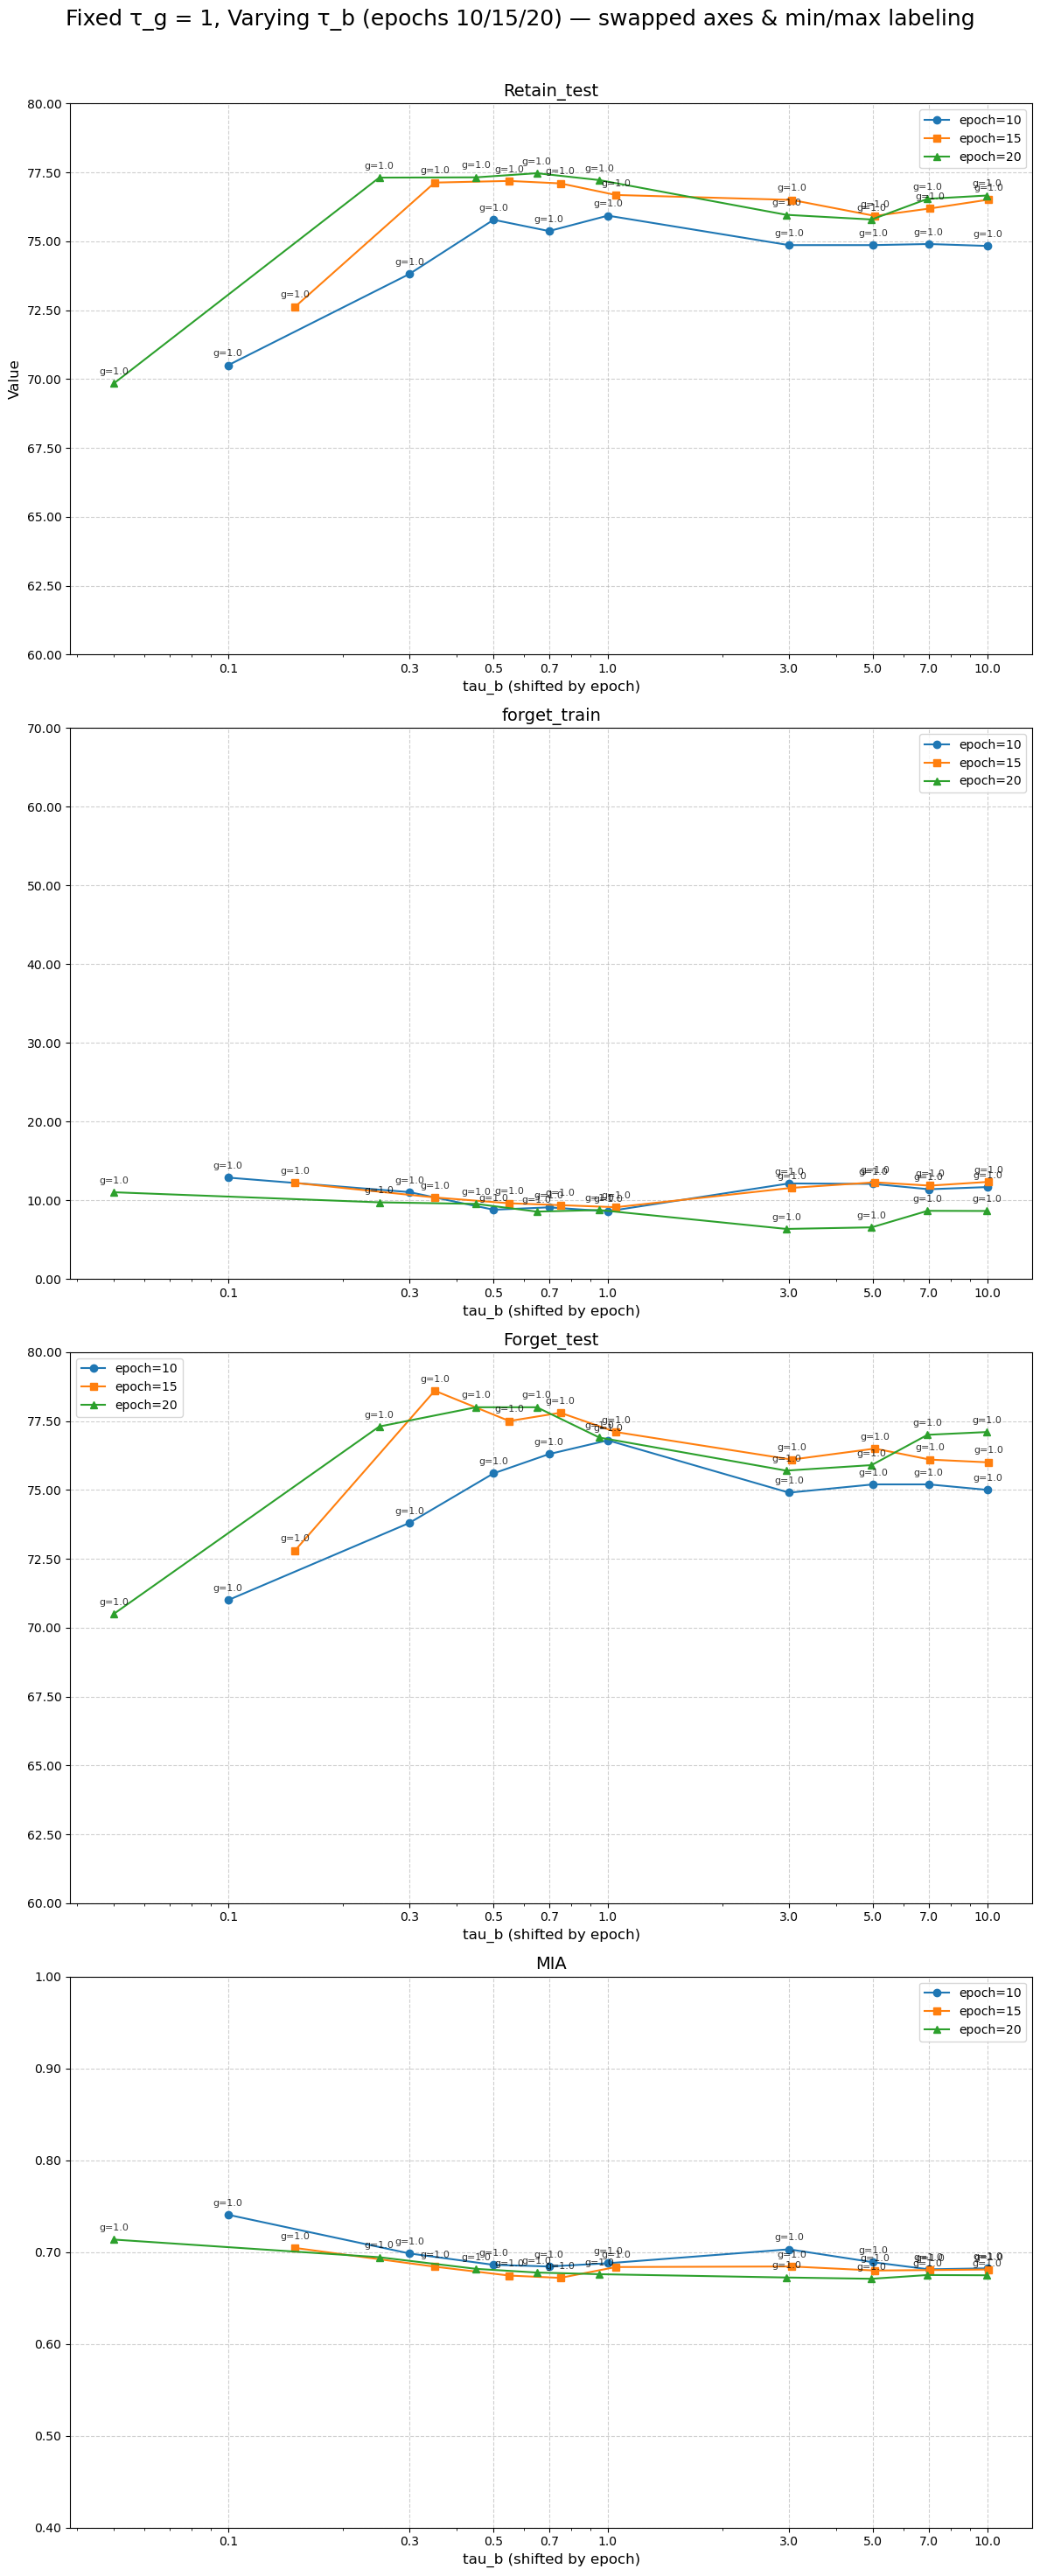

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩
path = '/root/Public_Storage/madelab_khw/kd_tau_sample/ce_false_summary.csv'
data = pd.read_csv(path)

# good_teacher_tau (tau_g) 고정, bad_teacher_tau (tau_b) 변화
fixed_tau_g = 1
filtered_data = data[data["tau_g"] == fixed_tau_g].copy()

# epoch별 서브셋
sub = {ep: filtered_data[filtered_data["epochs"] == ep] for ep in [10, 15, 20]}

metrics = ["Retain_test", "forget_train", "Forget_test", "MIA"]
scales = {
    "Retain_test": (60, 80),
    "forget_train": (0, 70),
    "Forget_test": (60, 80),
    "MIA": (0.4, 1),
}

# x축 눈금 (tau_b)
xticks = [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10]

# epoch별 x축 오프셋
xshift = {10: 0.0, 15: 0.05, 20: -0.05}

fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 30))

markers = {10: "o-", 15: "s-", 20: "^-"}

for i, m in enumerate(metrics):
    ax = axes[i]

    for ep in [10, 15, 20]:
        df = sub[ep]
        if df.empty:
            continue

        # x축을 tau_b로 사용 (tau_b 변화)
        x = df["tau_b"].astype(float).values + xshift[ep]
        y = df[m].astype(float).values

        ax.plot(x, y, markers[ep], label=f"epoch={ep}")

        # tau_b별로 min/max tau_g만 라벨링
        g = df.groupby("tau_b", as_index=False)
        to_label = []
        for tau_b, gdf in g:
            if gdf.empty:
                continue
            idx_min = gdf["tau_g"].idxmin()
            idx_max = gdf["tau_g"].idxmax()
            to_label.extend([idx_min, idx_max])

        labeled = df.loc[sorted(set(to_label))].copy()
        for _, r in labeled.iterrows():
            xx = float(r["tau_b"]) + xshift[ep]  # tau_b를 x축으로 사용
            yy = float(r[m])
            is_max = r["tau_g"] == df[df["tau_b"] == r["tau_b"]]["tau_g"].max()
            dy = 6 if is_max else -10
            ax.annotate(f"g={r['tau_g']}", xy=(xx, yy),
                        xytext=(0, dy), textcoords="offset points",
                        ha="center", va="bottom" if is_max else "top",
                        fontsize=8, alpha=0.8, clip_on=True)

    ax.set_title(m, fontsize=14)
    ax.set_xlabel("tau_b (shifted by epoch)", fontsize=12)
    ax.set_ylim(scales[m])
    ax.set_xscale("log")
    ax.set_xticks(xticks)
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # 로그축에서도 숫자 그대로 표시
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))  # ✅ y축 소수점 2자리 표시
    ax.grid(True, linestyle="--", alpha=0.6)
    if i == 0:
        ax.set_ylabel("Value", fontsize=12)
    ax.legend()

plt.suptitle("Fixed τ_g = 1, Varying τ_b (epochs 10/15/20) — swapped axes & min/max labeling", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


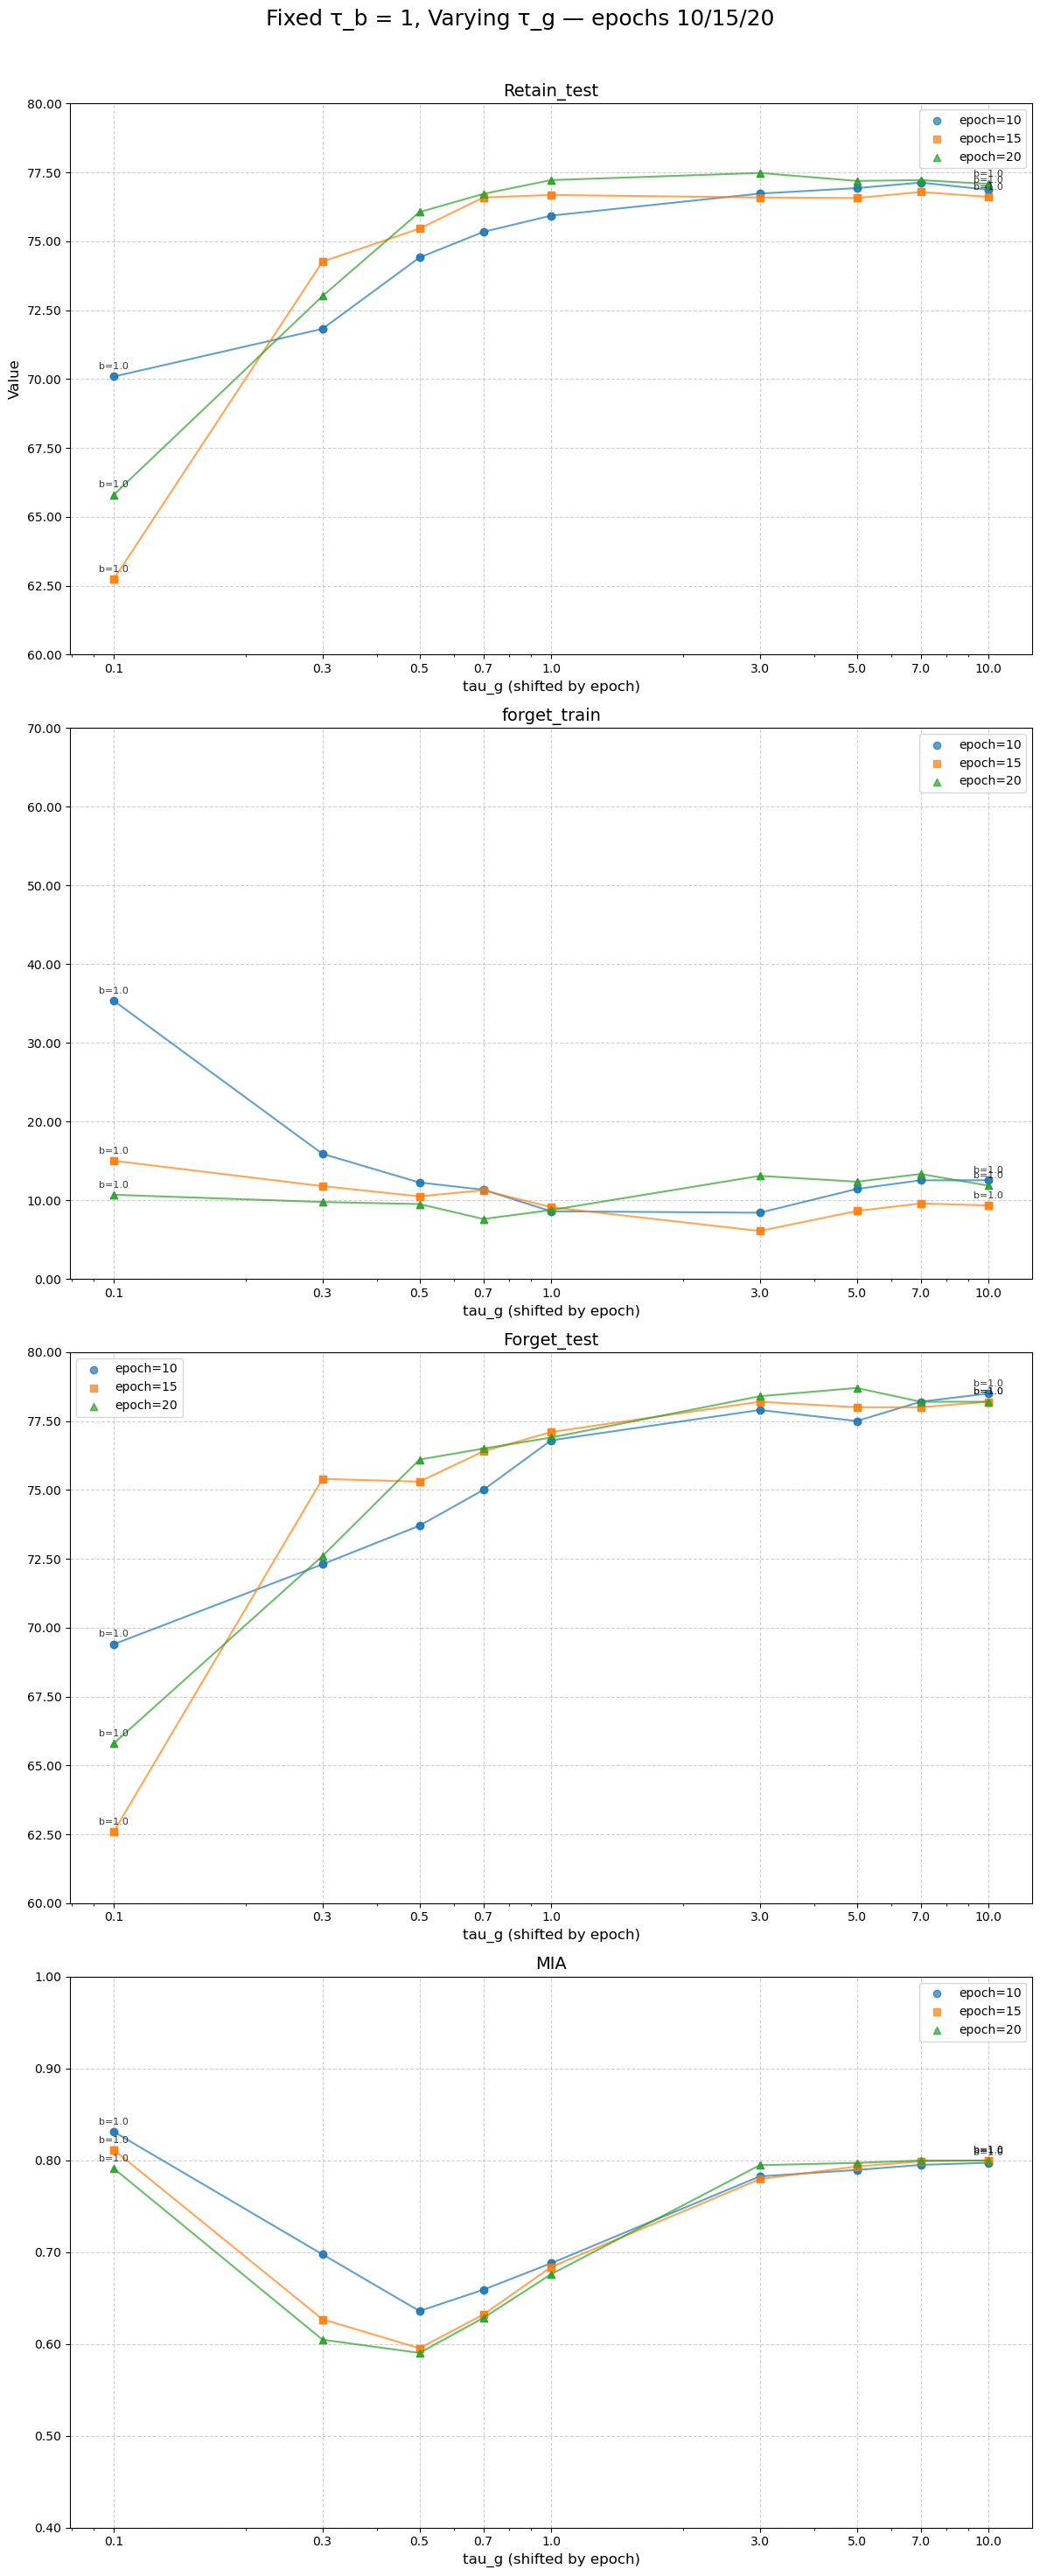

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩
path = '/root/Public_Storage/madelab_khw/kd_tau_sample/ce_false_summary.csv'
data = pd.read_csv(path)

# bad_teacher_tau (tau_b) 고정, good_teacher_tau (tau_g) 변화
fixed_tau_b = 1
filtered_data = data[data["tau_b"] == fixed_tau_b].copy()

# epoch별 서브셋
sub = {ep: filtered_data[filtered_data["epochs"] == ep] for ep in [10, 15, 20]}

metrics = ["Retain_test", "forget_train", "Forget_test", "MIA"]
scales = {
    "Retain_test": (60, 80),
    "forget_train": (0, 70),
    "Forget_test": (60, 80),
    "MIA": (0.4, 1),
}

# x축 눈금 (tau_g)
xticks = [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10]

# epoch별 x축 오프셋
xshift = {10: 0.0, 15: 0.05, 20: -0.05}
markers = {10: "o", 15: "s", 20: "^"}

fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 30))

for i, m in enumerate(metrics):
    ax = axes[i]

    for ep in [10, 15, 20]:
        df = sub[ep]
        if df.empty:
            continue

        # x축을 tau_g로 사용 (tau_g 변화)
        x = df["tau_g"].astype(float).values
        y = df[m].astype(float).values
        ax.scatter(x, y, marker=markers[ep], label=f"epoch={ep}", alpha=0.7)

        # 각 점을 선으로 연결
        ax.plot(x, y, marker=markers[ep], alpha=0.7)

        # ---- 라벨: tau_g 극단값(최소/최대)에서만 표시 ----
        for tau_g in [df["tau_g"].min(), df["tau_g"].max()]:
            gdf = df[df["tau_g"] == tau_g]
            if not gdf.empty:
                r = gdf.loc[gdf["tau_b"].idxmax()]  # 큰 tau_b 하나만 라벨링
                ax.annotate(f"b={r['tau_b']}", xy=(r["tau_g"], r[m]),
                            xytext=(0, 6), textcoords="offset points",
                            ha="center", fontsize=8, alpha=0.8)

    ax.set_title(m, fontsize=14)
    ax.set_xlabel("tau_g (shifted by epoch)", fontsize=12)
    ax.set_ylim(scales[m])
    ax.set_xscale("log")
    ax.set_xticks(xticks)
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
    ax.grid(True, linestyle="--", alpha=0.6)
    if i == 0:
        ax.set_ylabel("Value", fontsize=12)
    ax.legend()

plt.suptitle("Fixed τ_b = 1, Varying τ_g — epochs 10/15/20", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
